# SQL Assignment

In [1]:
import pandas as pd
import sqlite3

from IPython.display import display, HTML

In [2]:
# Note that this is not the same db we have used in course videos, please download from this link
# https://drive.google.com/file/d/1O-1-L1DdNxEK6O6nG2jS31MbrMh-OnXM/view?usp=sharing

In [3]:
conn = sqlite3.connect("C:/Users/Abhishek V/Downloads/Db-IMDB-Assignment.db")

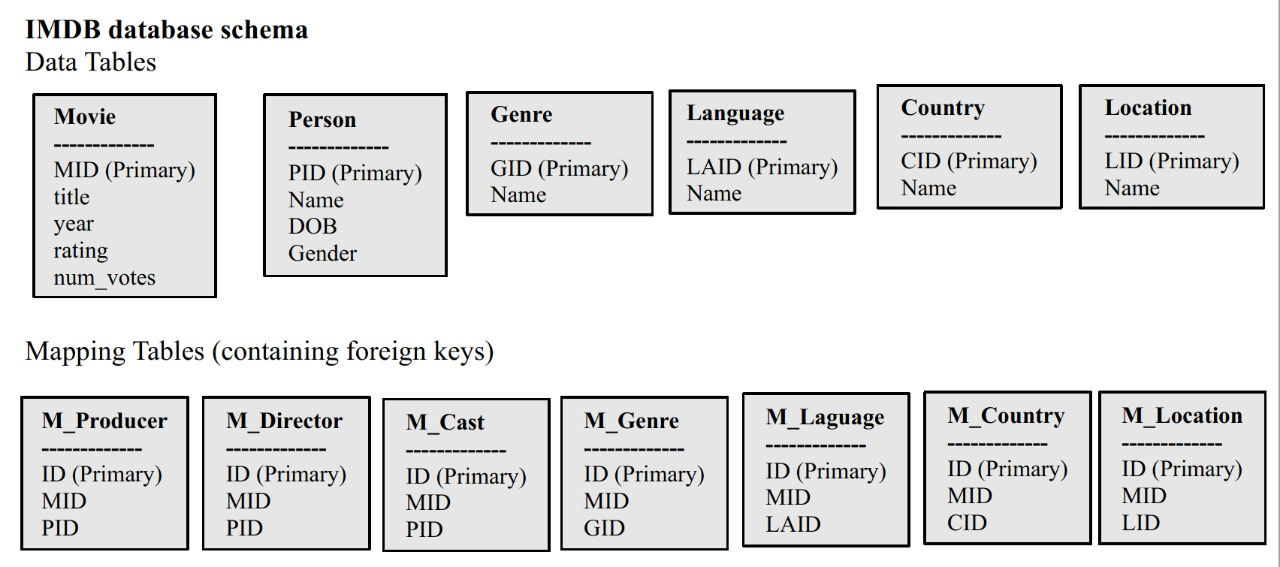

In [4]:
from IPython.display import Image
Image("C:/Users/Abhishek V/Downloads/db_schema.jpeg",width=1200, height=300)

#### Overview of all tables

In [5]:
tables = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type='table'",conn)
tables = tables["Table_Name"].values.tolist()

In [6]:
for table in tables:
    query = "PRAGMA TABLE_INFO({})".format(table)
    schema = pd.read_sql_query(query,conn)
    print("Schema of",table)
    display(schema)
    print("-"*100)
    print("\n")

Schema of Movie


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,MID,TEXT,0,None,0
2,2,title,TEXT,0,None,0
3,3,year,TEXT,0,None,0
4,4,rating,REAL,0,None,0
5,5,num_votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of Genre


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,Name,TEXT,0,None,0
2,2,GID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of Language


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,Name,TEXT,0,None,0
2,2,LAID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of Country


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,Name,TEXT,0,None,0
2,2,CID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of Location


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,Name,TEXT,0,None,0
2,2,LID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of M_Location


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,MID,TEXT,0,None,0
2,2,LID,REAL,0,None,0
3,3,ID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of M_Country


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,MID,TEXT,0,None,0
2,2,CID,REAL,0,None,0
3,3,ID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of M_Language


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,MID,TEXT,0,None,0
2,2,LAID,INTEGER,0,None,0
3,3,ID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of M_Genre


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,MID,TEXT,0,None,0
2,2,GID,INTEGER,0,None,0
3,3,ID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of Person


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,PID,TEXT,0,None,0
2,2,Name,TEXT,0,None,0
3,3,Gender,TEXT,0,None,0


----------------------------------------------------------------------------------------------------


Schema of M_Producer


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,MID,TEXT,0,None,0
2,2,PID,TEXT,0,None,0
3,3,ID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of M_Director


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,MID,TEXT,0,None,0
2,2,PID,TEXT,0,None,0
3,3,ID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of M_Cast


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,MID,TEXT,0,None,0
2,2,PID,TEXT,0,None,0
3,3,ID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




In [7]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("C:/Users/Abhishek V/Downloads/Db-IMDB-Assignment.db")
#cur = conn.cursor()
#cur.execute("select * from Person limit 5;")
#results = cur.fetchall()
#print(results)
#result = pd.read_sql_query("SELECT * FROM M_CAST LIMIT 10 ", conn)
result = pd.read_sql_query("SELECT * FROM MOVIE LIMIT 10 ", conn)
result

,index,MID,title,year,rating,num_votes
0,0,tt2388771,Mowgli,2018,6.6,21967
1,1,tt5164214,Ocean's Eight,2018,6.2,110861
2,2,tt1365519,Tomb Raider,2018,6.4,142585
3,3,tt0848228,The Avengers,2012,8.1,1137529
4,4,tt8239946,Tumbbad,2018,8.5,7483
5,5,tt7027278,Kedarnath,2018,5.5,1970
6,6,tt3498820,Captain America: Civil War,2016,7.8,536641
7,7,tt8108198,Andhadhun,2018,9.0,18160
8,8,tt3741834,Lion,2016,8.1,170216
9,9,tt6747420,Rajma Chawal,2018,5.7,681


## Useful tips:

1. the year column in 'Movie' table, will have few chracters other than numbers which you need to be preprocessed, you need to get a substring of last 4 characters, its better if you convert it as int type, ex: CAST(SUBSTR(TRIM(m.year),-4) AS INTEGER)

2. For almost all the TEXT columns we have show, please try to remove trailing spaces, you need to use TRIM() function

3. When you are doing count(coulmn) it won't consider the "NULL" values, you might need to explore other alternatives like Count(*)

## Q1 --- List all the directors who directed a 'Comedy' movie in a leap year. (You need to check that the genre is 'Comedy’ and year is a leap year) Your query should return director name, the movie name, and the year.

<h4>To determine whether a year is a leap year, follow these steps:</h4>

<ul>
    <li><b>STEP-1:</b> If the year is evenly divisible by 4, go to step 2. Otherwise, go to step 5.</li>
    <li><b>STEP-2:</b> If the year is evenly divisible by 100, go to step 3. Otherwise, go to step 4.</li>
    <li><b>STEP-3:</b> If the year is evenly divisible by 400, go to step 4. Otherwise, go to step 5.</li>
    <li><b>STEP-4:</b> The year is a leap year (it has 366 days).</li>
    <li><b>STEP-5:</b> The year is not a leap year (it has 365 days).</li>
</ul>

Year 1900 is divisible by 4 and 100 but it is not divisible by 400, so it is not a leap year.

In [8]:


query1 =pd.read_sql_query( "SELECT  \
                          DISTINCT TRIM(P.Name) As Director_Name\
                        ,M.title As Movie_Name \
                        ,M.year AS Year \
                        FROM M_GENRE AS M_G \
                        LEFT JOIN GENRE AS G \
                        ON M_G.GID = G.GID \
                        ,    Movie As M \
                        LEFT JOIN Person As P \
                        ,         M_Director As MD \
                        ON M.MID = MD.MID AND P.PID = MD.PID \
                        WHERE (Trim(M.year) %4 ==0) \
                        AND M.MID = M_G.MID AND Trim(G.NAME) LIKE '%COMEDY%' ", conn)

(query1)

,Director_Name,Movie_Name,Year
0,Milap Zaveri,Mastizaade,2016
1,Danny Leiner,Harold & Kumar Go to White Castle,2004
2,Anurag Kashyap,Gangs of Wasseypur,2012
3,Frank Coraci,Around the World in 80 Days,2004
4,Griffin Dunne,The Accidental Husband,2008
...,...,...,...
241,Siddharth Anand Kumar,Let's Enjoy,2004
242,Amma Rajasekhar,Sathyam,2008
243,Oliver Paulus,Tandoori Love,2008
244,Raja Chanda,Le Halua Le,2012


## Q2 --- List the names of all the actors who played in the movie 'Anand' (1971)

In [9]:
res1 = pd.read_sql_query(
                        "SELECT  \
                        P.Name As Actor_Name\
                        FROM Movie As M \
                        LEFT JOIN Person As P \
                        ,         M_Cast As C \
                        ON TRIM(M.MID) = TRIM(C.MID) \
                        AND TRIM(P.PID) = TRIM(C.PID) \
                        WHERE M.title LIKE 'Anand' ", conn)
res1

,Actor_Name
0,Amitabh Bachchan
1,Rajesh Khanna
2,Sumita Sanyal
3,Ramesh Deo
4,Seema Deo
5,Asit Kumar Sen
6,Dev Kishan
7,Atam Prakash
8,Lalita Kumari
9,Savita


## Q3 --- List all the actors who acted in a film before 1970 and in a film after 1990. (That is: < 1970 and > 1990.)

In [10]:

#source: https://stackoverflow.com/questions/29617880/sql-list-actors-who-acted-in-a-film-before-1900-and-also-in-a-film-after-2000
ans = pd.read_sql_query("SELECT name Actor FROM Person WHERE TRIM(PID) IN \
                          (SELECT TRIM(PID) FROM M_Cast WHERE MID IN \
                          (SELECT MID FROM Movie m WHERE m.year > 1990) \
                          AND PID IN (SELECT PID FROM M_Cast WHERE MID IN \
                          (SELECT MID FROM Movie n WHERE n.year < 1970)))",conn)
ans

,Actor
0,Rishi Kapoor
1,Amitabh Bachchan
2,Asrani
3,Zohra Sehgal
4,Parikshat Sahni
...,...
328,Poonam
329,Jamila Massey
330,K.R. Vijaya
331,Sethi


## Q4 --- List all directors who directed 10 movies or more, in descending order of the number of movies they directed. Return the directors' names and the number of movies each of them directed.

In [11]:
ans = pd.read_sql_query("SELECT DISTINCT p.Name Director,COUNT(*) number_of_movies FROM Person p \
                          JOIN M_Director d on TRIM(p.PID) = TRIM(d.PID) \
                          GROUP BY TRIM(d.PID) HAVING COUNT(*) >=10 ORDER BY number_of_movies DESC",conn)
ans

,Director,number_of_movies
0,David Dhawan,39
1,Mahesh Bhatt,35
2,Ram Gopal Varma,30
3,Priyadarshan,30
4,Vikram Bhatt,29
5,Hrishikesh Mukherjee,27
6,Yash Chopra,21
7,Shakti Samanta,19
8,Basu Chatterjee,19
9,Subhash Ghai,18


## Q5.a --- For each year, count the number of movies in that year that had only female actors.

In [12]:
#source: https://stackoverflow.com/questions/57743348/sql-query-imdb-data-to-count-the-total-movies-with-only-female-cast-per-year
ans = pd.read_sql_query("SELECT movie.year Year,count(*) Count FROM Movie \
                          WHERE NOT EXISTS \
                          (SELECT * FROM M_Cast,Person WHERE person.gender='Male' and M_Cast.MID = movie.MID \
                          and M_Cast.PID = person.PID ) GROUP BY movie.year",conn)
ans

,Year,Count
0,1931,1
1,1936,3
2,1939,2
3,1941,1
4,1943,1
...,...,...
120,IV 2011,1
121,IV 2017,1
122,V 2015,1
123,VI 2015,1


## Q5.b --- Now include a small change: report for each year the percentage of movies in that year with only female actors, and the total number of movies made that year. For example, one answer will be: 1990 31.81 13522 meaning that in 1990 there were 13,522 movies, and 31.81% had only female actors. You do not need to round your answer.

In [13]:
#source: https://stackoverflow.com/questions/57743348/sql-query-imdb-data-to-count-the-total-movies-with-only-female-cast-per-year
ans = pd.read_sql_query("SELECT female_count.year Year,((female_count.Total_movies_with_only_female_leads)*100)/total_count.Total Percentage FROM \
                            ((SELECT movie.year Year,count(*) Total_movies_with_only_female_leads FROM movie WHERE NOT EXISTS \
                            ( SELECT * FROM M_Cast,person WHERE M_Cast.mid = movie.MID and M_Cast.PID = person.PID AND person.gender='Male' ) \
                            GROUP BY movie.year) female_count, \
                            (SELECT movie.year,count(*) as Total FROM movie group by movie.year) total_count) \
                            WHERE female_count.year=total_count.year",conn)
ans

,Year,Percentage
0,1931,100
1,1936,100
2,1939,100
3,1941,100
4,1943,100
...,...,...
120,IV 2011,100
121,IV 2017,100
122,V 2015,100
123,VI 2015,100


In [17]:
#reference from github
res1 = pd.read_sql_query( 
                        "SELECT SUBSTR(M.YEAR,-4) AS YEAR\
                                ,COUNT(DISTINCT M.MID) As Movie_T \
                                ,CAST( (T1.MOVIE_F * 100.00) / COUNT(DISTINCT M.MID) AS FLOAT)  AS PER_F \
                        FROM MOVIE M \
                        ,                   (\
                                          SELECT SUBSTR(M.YEAR,-4) AS YEAR\
                                                  ,COUNT(DISTINCT M.MID) As Movie_F \
                                          FROM MOVIE M \
                                          WHERE M.MID NOT IN (\
                                                              SELECT M.MID \
                                                              FROM MOVIE M \
                                                                  , M_Cast As C\
                                                                  , Person As P \
                                                                WHERE M.MID = C.MID \
                                                                AND P.PID = TRIM(C.PID)\
                                                                AND P.Gender ='Male' \
                                                              )\
                                          GROUP BY SUBSTR(M.YEAR,-4)\
                                          ) AS T1 \
                          WHERE CAST(SUBSTR(M.YEAR,-4) AS INT) = T1.YEAR \
                          GROUP BY SUBSTR(M.YEAR,-4)\
                    ", conn) 
res1

,YEAR,Movie_T,PER_F
0,1939,2,50.000000
1,1999,66,1.515152
2,2000,64,1.562500
3,2018,104,0.961538


## Q6 --- Find the film(s) with the largest cast. Return the movie title and the size of the cast. By "cast size" we mean the number of distinct actors that played in that movie: if an actor played multiple roles, or if it simply occurs multiple times in casts, we still count her/him only once.

In [14]:
ans = pd.read_sql_query("SELECT m.title Movie_Name,count(distinct(c.PID)) Cast_Size FROM Movie m JOIN M_Cast c \
                            ON c.MID = m.MID GROUP BY m.MID ORDER BY Cast_Size desc",conn)
ans

,Movie_Name,Cast_Size
0,Ocean's Eight,238
1,Apaharan,233
2,Gold,215
3,My Name Is Khan,213
4,Captain America: Civil War,191
...,...,...
3468,Vaibhav Sethia: Don't,1
3469,Chaar Sahibzaade 2: Rise of Banda Singh Bahadur,1
3470,Subah Subah,1
3471,Return of Hanuman,1


### Q7 --- A decade is a sequence of 10 consecutive years. 
### For example, say in your database you have movie information starting from 1931. 
### the first decade is 1931, 1932, ..., 1940,
### the second decade is 1932, 1933, ..., 1941 and so on. 
### Find the decade D with the largest number of films and the total number of films in D

In [15]:
ans = pd.read_sql_query("SELECT d.year Start, d.year+9 End, count(*) no_of_films FROM \
                            (SELECT DISTINCT year from Movie) d JOIN Movie m ON m.year >= Start and m.year<= End \
                            GROUP BY End ORDER BY no_of_films desc LIMIT 1",conn)
ans

,Start,End,no_of_films
0,2008,2017,1126


## Q8 --- Find all the actors that made more movies with Yash Chopra than any other director.

In [18]:
#SOURCE: GITHUB
res1 = pd.read_sql_query(
            "SELECT DISTINCT T1.ACTOR_NAME FROM \
                              (SELECT P1.NAME AS ACTOR_NAME \
                              ,COUNT(M.MID) AS MOVIE_COUNT_Y \
                              ,P1.PID AS PID \
                              FROM Movie As M \
                              LEFT JOIN Person As P1 \
                              ,         Person As P2 \
                              ,         M_Cast As C \
                              ,         M_Director MD \
                              ON  M.MID = C.MID \
                              AND P1.PID = TRIM(C.PID) \
                              AND M.MID = MD.MID \
                              AND P2.PID = MD.PID \
                              WHERE  TRIM(P2.NAME) LIKE 'Yash Chopra' \
                              GROUP BY TRIM(P1.Name), P1.PID \
                              ) T1 \
                      JOIN \
                            (SELECT P1.NAME AS ACTOR_NAME \
                              ,P2.NAME AS DIRECTOR_NAME \
                              ,COUNT(M.MID) AS MOVIE_COUNT \
                              ,P1.PID AS PID \
                              FROM Movie As M \
                              LEFT JOIN Person As P1 \
                              ,         Person As P2 \
                              ,         M_Cast As C \
                              ,         M_Director MD \
                              ON  M.MID = C.MID \
                              AND P1.PID = TRIM(C.PID) \
                              AND M.MID = MD.MID \
                              AND P2.PID = MD.PID \
                              WHERE  TRIM(P2.NAME) NOT LIKE 'Yash Chopra' \
                              GROUP BY P1.Name, P2.Name, P1.PID \
                            ) T2 \
            ON T1.PID = T2.PID \
            AND T1.MOVIE_COUNT_Y  > T2.MOVIE_COUNT    ", conn)
res1

,ACTOR_NAME
0,A.K. Hangal
1,Achala Sachdev
2,Amitabh Bachchan
3,Ananth Narayan Mahadevan
4,Anil Kapoor
...,...
70,Vikas Anand
71,Vinod Khanna
72,Waheeda Rehman
73,Yash Chopra


In [19]:
#self done

ans = pd.read_sql_query("SELECT DISTINCT  Actor, Count(*) Movies_with_YashChopra \
 FROM(SELECT DISTINCT p1.Name as Director, m1.title as Movie \
 FROM Person p1 Inner Join M_Director md on TRIM(md.PID)=p1.PID \
 Inner Join Movie m1 on TRIM(md.MID)=m1.MID and  p1.Name LIKE 'Yash%' Group By p1.Name, m1.title) t1 \
 Inner Join (SELECT DISTINCT p2.Name as Actor,m2.title as Movie from Person p2 \
 Inner Join M_Cast mc on TRIM(mc.PID)=p2.PID \
 Inner Join Movie m2 on TRIM(mc.MID)=m2.MID Group By p2.Name, m2.title) t2 on t1.Movie=t2.Movie \
 Group By t2.Actor Order By Movies_with_YashChopra DESC",conn)
ans

#REQUESTING TO TEACH WHY MY SELF DONE OUTPUT IS EMPTY SIR/MAM COULDN'T FIND

,Actor,Movies_with_YashChopra


## Q9 --- The Shahrukh number of an actor is the length of the shortest path between the actor and Shahrukh Khan in the "co-acting" graph. That is, Shahrukh Khan has Shahrukh number 0; all actors who acted in the same film as Shahrukh have Shahrukh number 1; all actors who acted in the same film as some actor with Shahrukh number 1 have Shahrukh number 2, etc. Return all actors whose Shahrukh number is 2.

In [20]:
# SELF DONE
ans = pd.read_sql_query("SELECT DISTINCT TRIM(name) Name \
 FROM Person p INNER JOIN M_Cast c on p.PID = TRIM(c.PID) INNER JOIN Movie m ON m.MID = c.MID AND TRIM(p.Name)!='Shah Rukh Khan' \
 and m.title in (SELECT DISTINCT title FROM Person p3 INNER JOIN M_Cast c3 on p3.PID = TRIM(c3.PID) AND TRIM(p3.Name) = p3.Name \
 INNER JOIN Movie m3 ON m3.MID = c3.MID AND p3.Name IN (SELECT DISTINCT Name FROM Person p2 INNER JOIN M_Cast c2 ON p2.PID = TRIM(c2.PID) \
 INNER JOIN Movie m2 ON m2.MID = c2.MID AND TRIM(p2.Name)!='Shah Rukh Khan' AND m2.title IN \
 (SELECT DISTINCT title FROM Person p3 INNER JOIN M_Cast c3 ON p3.PID = TRIM(c3.PID) AND TRIM(p3.Name) = 'Shah Rukh Khan' \
 INNER JOIN Movie m3 ON m3.MID = c3.MID))) ORDER BY Name",conn)
 
ans


#REQUESTING TO TEACH WHY MY SELF DONE OUTPUT IS EMPTY SIR/MAM COULDN'T FIND

,Name


In [21]:
#REFERENCE = GITHUB
res1 = pd.read_sql_query("\
                          SELECT DISTINCT P1.NAME \
                          FROM MOVIE AS M1 \
                          LEFT JOIN Person As P1 \
                          ,         M_Cast As C1 \
                          ON  M1.MID = C1.MID \
                          AND P1.PID = TRIM(C1.PID) \
                          AND M1.MID IN(\
                                        SELECT DISTINCT M1.MID \
                                        FROM MOVIE AS M1 \
                                        LEFT JOIN Person As P1 \
                                        ,         M_Cast As C1 \
                                        ON  M1.MID = C1.MID \
                                        AND P1.PID = TRIM(C1.PID) \
                                        AND P1.PID IN\
                                                      (\
                                                      SELECT DISTINCT P1.PID \
                                                      FROM MOVIE AS M1 \
                                                      LEFT JOIN Person As P1 \
                                                      ,         M_Cast As C1 \
                                                      ON  M1.MID = C1.MID \
                                                      AND P1.PID = TRIM(C1.PID) \
                                                      AND P1.PID NOT IN('nm0451321')\
                                                      WHERE M1.MID IN (\
                                                                      SELECT DISTINCT M1.MID \
                                                                      FROM MOVIE AS M1 \
                                                                      LEFT JOIN Person As P1 \
                                                                      ,         M_Cast As C1 \
                                                                      ON  M1.MID = C1.MID \
                                                                      AND P1.PID = TRIM(C1.PID)\
                                                                      WHERE TRIM(P1.NAME) LIKE '%Shah Rukh Khan%' \
                                                                        )\
                                                      )\
                                  )\
                                          ", conn)
res1

,Name
0,Kristin Scott Thomas
1,Derek Jacobi
2,Nick Frost
3,Walton Goggins
4,Michael Obiora
...,...
26516,Minoo Mehtab
26517,Mohini Manik
26518,Kamal Maharshi
26519,Hayley Cleghorn
